In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [4]:
ipl=pd.read_csv('datasets_323_7768_matches.csv')
ipl=ipl.drop(['win_by_runs','win_by_wickets'],axis=1)
#ipl['winner'].replace(['Rising Pune Supergiants'],['Rising Pune Supergiant'],inplace=True)
def converter(team):
    ipl[team].replace(['Sunrisers Hyderabad','Rising Pune Supergiant','Kolkata Knight Riders','Kings XI Punjab','Royal Challengers Bangalore',
                          'Gujarat Lions','Mumbai Indians','Delhi Daredevils','Chennai Super Kings','Rajasthan Royals','Rising Pune Supergiants','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors'],['srh','rps','kkr','kxip','rcb','gl','mi','dd','csk','rr','rps','srh','ktk','pw'],inplace=True)
    
converter('team1')
converter('team2')
converter('winner')
converter('toss_winner')

ipl=ipl.sort_values(['season'],ascending=True)
sun=ipl.loc[ipl['season']>2012]
sun=sun.sort_values(['season'])
#sun.groupby(['winner']).count()['id']
sun

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue,umpire1,umpire2,umpire3
408,409,2013,Chandigarh,2013-04-21,pw,kxip,kxip,field,normal,0,kxip,DA Miller,"Punjab Cricket Association Stadium, Mohali",M Erasmus,K Srinath,NaN
429,430,2013,Mumbai,2013-05-05,mi,csk,mi,bat,normal,0,mi,MG Johnson,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
428,429,2013,Bangalore,2013-05-14,rcb,kxip,kxip,field,normal,0,kxip,AC Gilchrist,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,NaN
427,428,2013,Hyderabad,2013-05-04,dd,srh,dd,bat,normal,0,srh,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
425,426,2013,Pune,2013-05-02,rcb,pw,rcb,bat,normal,0,rcb,AB de Villiers,Subrata Roy Sahara Stadium,Aleem Dar,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2017,Indore,2017-04-08,rps,kxip,kxip,field,normal,0,kxip,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
2,3,2017,Rajkot,2017-04-07,gl,kkr,kkr,field,normal,0,kkr,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
1,2,2017,Pune,2017-04-06,mi,rps,rps,field,normal,0,rps,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,dd,kxip,dd,bat,normal,0,dd,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


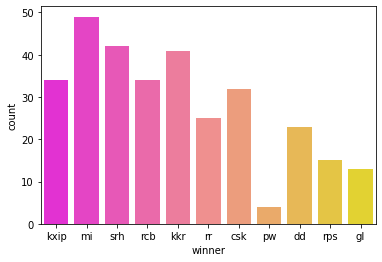

In [5]:
#sns.set_style('darkgrid')
plo=sns.countplot(x='winner',data=sun,palette='spring')

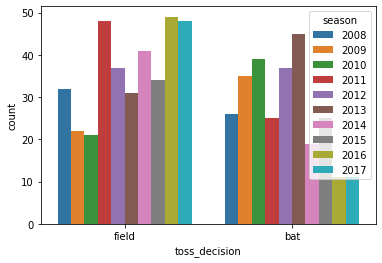

In [6]:
sns.countplot(x='toss_decision',hue='season',data=ipl)

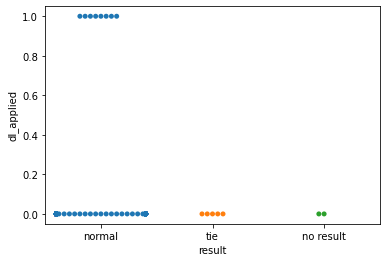

In [7]:
sns.swarmplot(x='result',y='dl_applied',data=sun)

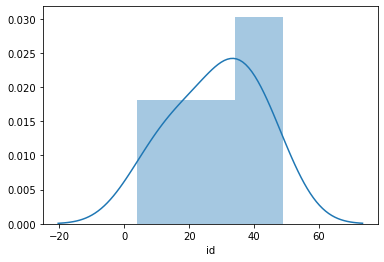

In [7]:
x=sun.groupby(['winner']).count()['id']
sns.distplot(x)

In [8]:
m=sun.groupby(['winner']).count()['id']

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


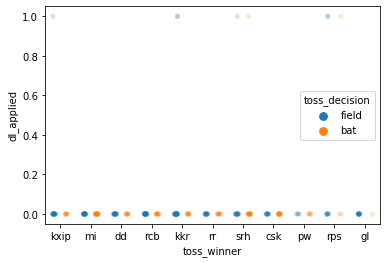

In [9]:
sns.stripplot(x='toss_winner',y='dl_applied',hue='toss_decision',split=True,edgecolor='gray',alpha=0.2,data=sun)

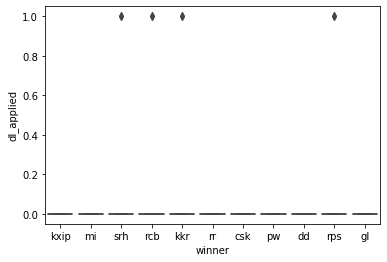

In [10]:
sns.boxplot(x='winner',y='dl_applied',data=sun)

In [12]:
sun['winner']=sun['winner'].cumsum()

TypeError: can only concatenate str (not "float") to str